In [40]:
# Importing libraries to be used.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import KFold
import pickle

In [11]:
# loading the dataset.
df = pd.read_csv('diabetes.csv')

In [28]:
# Rescaling data ( between 0 and 1).
array = df.values
# separating array into input and output components.
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarizing the transformed data.
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [13]:
# Standardize data (0 mean, 1 stdev).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [14]:
# Normalize data (length of 1).
# separating array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarizing transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [15]:
# binarization of data.
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)

set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


In [23]:
#train_test_splitting of the dataset

X = df.drop(columns = 'Outcome')

# Getting Predicting Value
y = df['Outcome']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [30]:
# Spot-Checking Algorithms to use
models = []
models.append(( 'Logistic Regression' , LogisticRegression()))
models.append(( 'Random Forest classifier' , RandomForestClassifier()))
models.append(( 'KNN' , KNeighborsClassifier()))
models.append(( 'Decision Tree classifier' , DecisionTreeClassifier()))
models.append(( 'Naive Bayes Gaussian' , GaussianNB()))
models.append(( 'SVM' , SVC()))
# evaluating each model in turn, using 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
results = []
names = []
for name, model in models:
    seed = 7
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy' )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Logistic Regression: 0.767372 (0.044529)
Random Forest classifier: 0.737890 (0.041887)
KNN: 0.710206 (0.049772)
Decision Tree classifier: 0.677790 (0.055521)
Naive Bayes Gaussian: 0.749418 (0.041042)
SVM: 0.752723 (0.045559)


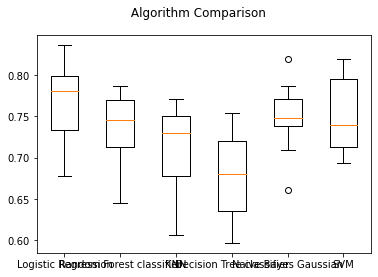

In [31]:
# Algorithm comparison on the spread and mean accuracy for each model.
fig = plt.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [35]:
# Make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7922077922077922
[[88  9]
 [23 34]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        97
           1       0.79      0.60      0.68        57

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154



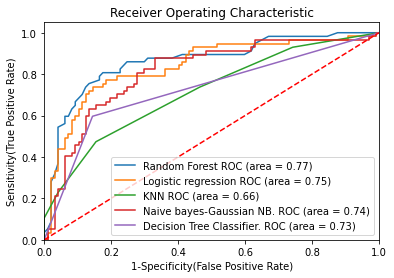

In [38]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# models to the list to be viewed on the ROC plot
models = [
    

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
    },
    
    {
    'label': 'Logistic regression',
    'model': LogisticRegression(),
    },
    
    {
    'label': 'KNN',
    'model': KNeighborsClassifier(),
    },
    
    {
    'label': 'Naive bayes-Gaussian NB.',
    'model':  GaussianNB(),
    },
    
    {
    'label': 'Decision Tree Classifier.',
    'model':  DecisionTreeClassifier(),
    },
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
file = open('LR.pkl', 'wb')
pickle.dump(LR, file)
file.close()